In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json
import random


# Import API key
import api_keys

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
#len(cities)
print(cities)
#cities

['hermanus', 'quzhou', 'portland', 'belushya guba', 'churumuco', 'dongsheng', 'chokurdakh', 'dicabisagan', 'busselton', 'alta floresta', 'samana', 'husavik', 'outjo', 'margate', 'kurilsk', 'saint-pierre', 'azogues', 'qaanaaq', 'sabha', 'rikitea', 'truro', 'fortuna', 'jamestown', 'ushuaia', 'terra santa', 'sobolevo', 'clyde river', 'hilo', 'vaini', 'sao miguel do oeste', 'yellowknife', 'grand centre', 'khonuu', 'leningradskiy', 'torbay', 'igarka', 'statesboro', 'timoteo', 'nador', 'nandurbar', 'albany', 'hithadhoo', 'grand river south east', 'kurumkan', 'sept-iles', 'ossora', 'mataura', 'butaritari', 'broome', 'chuy', 'godda', 'atuona', 'dikson', 'puerto ayora', 'kruisfontein', 'hobart', 'yumen', 'lima', 'bluff', 'east london', 'longyearbyen', 'kununurra', 'san carlos', 'inverness', 'carnarvon', 'saint-joseph', 'poum', 'guerrero negro', 'mar del plata', 'roma', 'illoqqortoormiut', 'castro', 'bolungarvik', 'sorong', 'petropavlovsk-kamchatskiy', 'pauini', 'maloy', 'gamba', 'saldanha', 'ca

## Perform API Calls

In [3]:

# OpenWeatherMap API Key
api_key = api_keys.api_key

# Starting URL for Weather Map API Call
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + api_key 

# List of city data
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "&q=" + city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out the max temp, humidity, and cloudiness
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | hermanus
Processing Record 2 of Set 1 | quzhou
Processing Record 3 of Set 1 | portland
Processing Record 4 of Set 1 | belushya guba
City not found. Skipping...
Processing Record 5 of Set 1 | churumuco
City not found. Skipping...
Processing Record 6 of Set 1 | dongsheng
Processing Record 7 of Set 1 | chokurdakh
Processing Record 8 of Set 1 | dicabisagan
Processing Record 9 of Set 1 | busselton
Processing Record 10 of Set 1 | alta floresta
Processing Record 11 of Set 1 | samana
Processing Record 12 of Set 1 | husavik
Processing Record 13 of Set 1 | outjo
Processing Record 14 of Set 1 | margate
Processing Record 15 of Set 1 | kurilsk
Processing Record 16 of Set 1 | saint-pierre
Processing Record 17 of Set 1 | azogues
Processing Record 18 of Set 1 | qaanaaq
Processing Record 19 of Set 1 | sabha
Processing Record 20 of Set 1 | rikitea
Processing Record 21 of Set 1 | truro
Processing Record 22 of Set 1

Processing Record 35 of Set 4 | cayenne
Processing Record 36 of Set 4 | aklavik
Processing Record 37 of Set 4 | victoria
Processing Record 38 of Set 4 | nouadhibou
Processing Record 39 of Set 4 | le port
Processing Record 40 of Set 4 | salalah
Processing Record 41 of Set 4 | svetlaya
Processing Record 42 of Set 4 | mys shmidta
City not found. Skipping...
Processing Record 43 of Set 4 | louisbourg
City not found. Skipping...
Processing Record 44 of Set 4 | vangaindrano
Processing Record 45 of Set 4 | faanui
Processing Record 46 of Set 4 | detmarovice
Processing Record 47 of Set 4 | nizhneyansk
City not found. Skipping...
Processing Record 48 of Set 4 | glens falls
Processing Record 49 of Set 4 | bahia blanca
Processing Record 0 of Set 5 | avarua
Processing Record 1 of Set 5 | farnham
Processing Record 2 of Set 5 | kysyl-syr
Processing Record 3 of Set 5 | tuktoyaktuk
Processing Record 4 of Set 5 | faya
Processing Record 5 of Set 5 | port hardy
Processing Record 6 of Set 5 | salym
Process

Processing Record 24 of Set 8 | payson
Processing Record 25 of Set 8 | cermik
Processing Record 26 of Set 8 | la palma
Processing Record 27 of Set 8 | olafsvik
City not found. Skipping...
Processing Record 28 of Set 8 | culpeper
Processing Record 29 of Set 8 | senanga
Processing Record 30 of Set 8 | muzhi
Processing Record 31 of Set 8 | saleaula
City not found. Skipping...
Processing Record 32 of Set 8 | yar-sale
Processing Record 33 of Set 8 | yonago
Processing Record 34 of Set 8 | abapo
Processing Record 35 of Set 8 | lorengau
Processing Record 36 of Set 8 | znamenskoye
Processing Record 37 of Set 8 | leshukonskoye
Processing Record 38 of Set 8 | daru
Processing Record 39 of Set 8 | college
Processing Record 40 of Set 8 | mirnyy
Processing Record 41 of Set 8 | amboasary
Processing Record 42 of Set 8 | krasnoselkup
City not found. Skipping...
Processing Record 43 of Set 8 | korla
City not found. Skipping...
Processing Record 44 of Set 8 | susangerd
Processing Record 45 of Set 8 | naka

Processing Record 10 of Set 12 | talnakh
Processing Record 11 of Set 12 | mantua
Processing Record 12 of Set 12 | edd
Processing Record 13 of Set 12 | aksarka
Processing Record 14 of Set 12 | ijaki
City not found. Skipping...
Processing Record 15 of Set 12 | waipawa
Processing Record 16 of Set 12 | viligili
City not found. Skipping...
Processing Record 17 of Set 12 | alekseyevsk
Processing Record 18 of Set 12 | port macquarie
Processing Record 19 of Set 12 | alnavar
Processing Record 20 of Set 12 | puerto madero
Processing Record 21 of Set 12 | bababe
City not found. Skipping...
Processing Record 22 of Set 12 | kapit
Processing Record 23 of Set 12 | koungou
City not found. Skipping...
Processing Record 24 of Set 12 | baiquan
Processing Record 25 of Set 12 | biltine
Processing Record 26 of Set 12 | pochutla
Processing Record 27 of Set 12 | kahului
Processing Record 28 of Set 12 | los llanos de aridane
Processing Record 29 of Set 12 | khorramshahr
Processing Record 30 of Set 12 | paamiut

In [4]:
print(city_data)

[{'City': 'hermanus', 'Lat': -34.42, 'Lng': 19.24, 'Max Temp': 58.75, 'Humidity': 46, 'Cloudiness': 0, 'Wind Speed': 7.63, 'Country': 'ZA', 'Date': 1531670791}, {'City': 'quzhou', 'Lat': 28.97, 'Lng': 118.86, 'Max Temp': 76.48, 'Humidity': 81, 'Cloudiness': 0, 'Wind Speed': 2.26, 'Country': 'CN', 'Date': 1531670791}, {'City': 'portland', 'Lat': 45.52, 'Lng': -122.67, 'Max Temp': 77, 'Humidity': 50, 'Cloudiness': 40, 'Wind Speed': 3.36, 'Country': 'US', 'Date': 1531669980}, {'City': 'dongsheng', 'Lat': 29.72, 'Lng': 112.52, 'Max Temp': 84.58, 'Humidity': 71, 'Cloudiness': 48, 'Wind Speed': 7.96, 'Country': 'CN', 'Date': 1531670792}, {'City': 'chokurdakh', 'Lat': 70.62, 'Lng': 147.9, 'Max Temp': 48.31, 'Humidity': 69, 'Cloudiness': 32, 'Wind Speed': 8.86, 'Country': 'RU', 'Date': 1531670792}, {'City': 'dicabisagan', 'Lat': 17.08, 'Lng': 122.42, 'Max Temp': 77.47, 'Humidity': 100, 'Cloudiness': 68, 'Wind Speed': 3.71, 'Country': 'PH', 'Date': 1531670792}, {'City': 'busselton', 'Lat': -33.

In [5]:
weather_df = pd.DataFrame(city_data)
weather_df

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,hermanus,0,ZA,1531670791,46,-34.42,19.24,58.75,7.63
1,quzhou,0,CN,1531670791,81,28.97,118.86,76.48,2.26
2,portland,40,US,1531669980,50,45.52,-122.67,77.00,3.36
3,dongsheng,48,CN,1531670792,71,29.72,112.52,84.58,7.96
4,chokurdakh,32,RU,1531670792,69,70.62,147.90,48.31,8.86
5,dicabisagan,68,PH,1531670792,100,17.08,122.42,77.47,3.71
6,busselton,88,AU,1531670792,100,-33.64,115.35,62.80,26.64
7,alta floresta,8,BR,1531670793,47,-9.87,-56.08,90.25,3.15
8,samana,40,EC,1531666800,83,0.12,-76.97,78.80,2.24
9,husavik,0,CA,1531670793,69,50.56,-96.99,67.21,17.92


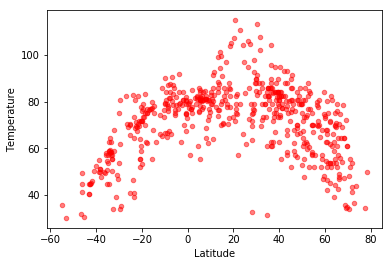

In [6]:
#Temperature vs Latitude scatter plot
#plt.scatter(urban_rides, urban_avgfare, s=8*urban_driver_count, c = 'coral',
 #          alpha = 0.8, label = "Urban")
temp_plot = weather_df.plot(kind = 'scatter', x = 'Lat', y = 'Max Temp',
                           alpha = 0.5, c = 'red')
#urban_plot = urban_scatter_df.plot(kind ='scatter', x = 'Rides', y ='Fares',
 #                       s=urban_scatter_df['Drivers'].values, alpha=0.5, c = 'coral')
plt.xlabel("Latitude")
plt.ylabel("Temperature")
plt.show()

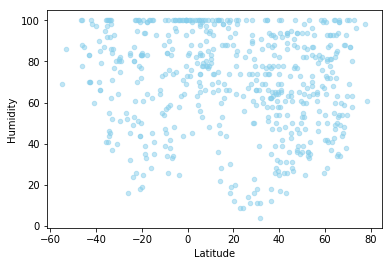

In [7]:
#Humidity vs Latitude scatter plot
humidity_plot = weather_df.plot(kind = 'scatter', x = 'Lat', y = 'Humidity',
                           alpha = 0.5, c = 'skyblue')
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.show()

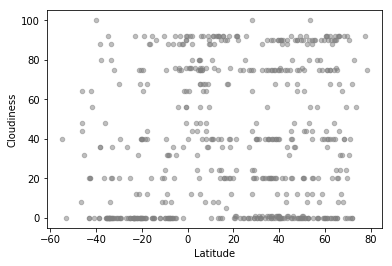

In [8]:
#Cloudiness vs Latitude scatter plot
cloud_plot = weather_df.plot(kind = 'scatter', x = 'Lat', y = 'Cloudiness',
                           alpha = 0.5, c = 'grey')
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.show()

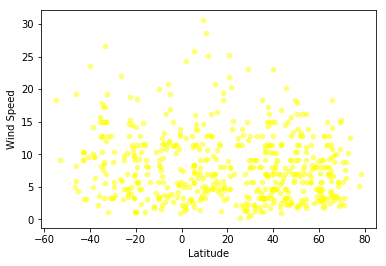

In [9]:
#Wind Speed vs Latitude scatter plot
wind_plot = weather_df.plot(kind = 'scatter', x = 'Lat', y = 'Wind Speed',
                           alpha = 0.5, c = 'yellow')
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.show()

#OBSERVATION
Temperature at the equator is greater because the path of light is shorter, resulting in less absorption and scattering of particles along the way.

Humidity and cloudiness is higher due to an increase in temperature results in an increase in the amount of water vapor the can hold.

Wind speed is much lower at the equator due to the thick vegetation acting as surface friction as the air travels.

In [ ]:
#Build query URL
query_url = url + "q=" + city + "&APPID="+ api_key 
#query_url = f"{url}q={cities}&APPID={api_key}"